In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
gs = pd.read_csv(r"C:\Users\drish\Desktop\football mentorship\football\archive\goalscorers.csv")

In [7]:
res = pd.read_csv(r"C:\Users\drish\Desktop\football mentorship\football\archive\results.csv")

In [8]:
so = pd.read_csv(r"C:\Users\drish\Desktop\football mentorship\football\archive\shootouts.csv")

In [9]:
len (gs)

44362

In [10]:
len (res)

47399

In [11]:
len (so)

644

In [12]:
gs.head(5)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [13]:
 gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44362 entries, 0 to 44361
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44362 non-null  object 
 1   home_team  44362 non-null  object 
 2   away_team  44362 non-null  object 
 3   team       44362 non-null  object 
 4   scorer     44313 non-null  object 
 5   minute     44103 non-null  float64
 6   own_goal   44362 non-null  bool   
 7   penalty    44362 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


In [14]:
newgs = gs.convert_dtypes()
newgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44362 entries, 0 to 44361
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44362 non-null  string 
 1   home_team  44362 non-null  string 
 2   away_team  44362 non-null  string 
 3   team       44362 non-null  string 
 4   scorer     44313 non-null  string 
 5   minute     44103 non-null  Int64  
 6   own_goal   44362 non-null  boolean
 7   penalty    44362 non-null  boolean
dtypes: Int64(1), boolean(2), string(5)
memory usage: 2.2 MB


In [15]:
newgs.isnull().sum()

date           0
home_team      0
away_team      0
team           0
scorer        49
minute       259
own_goal       0
penalty        0
dtype: int64

In [16]:
newgs.count()

date         44362
home_team    44362
away_team    44362
team         44362
scorer       44313
minute       44103
own_goal     44362
penalty      44362
dtype: int64

In [17]:
gs.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [18]:
newgs.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2,False,False


In [19]:
num_team = newgs.team.value_counts()
num_team

team
Brazil           1051
Germany           974
Argentina         948
Spain             894
Mexico            852
                 ... 
Eritrea             4
Somalia             3
Anguilla            2
South Sudan         2
French Guiana       2
Name: count, Length: 220, dtype: Int64

<Axes: ylabel='team'>

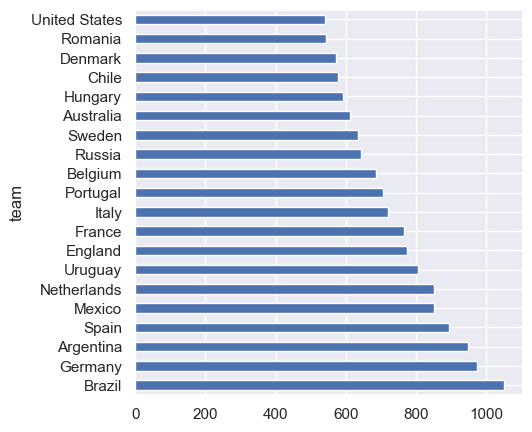

In [105]:
plt.figure(figsize=(5,5))
num_team[:20].plot(kind='barh',)

In [21]:
top_scorer=newgs[["team","scorer","own_goal"]]
top_scorer.head()

,team,scorer,own_goal
0,Uruguay,José Piendibene,False
1,Uruguay,Isabelino Gradín,False
2,Uruguay,Isabelino Gradín,False
3,Uruguay,José Piendibene,False
4,Argentina,Alberto Ohaco,False


In [22]:
top_scorer.describe()

,team,scorer,own_goal
count,44362,44313,44362
unique,220,14335,2
top,Brazil,Cristiano Ronaldo,False
freq,1051,108,43541


In [23]:
top_10_scorer = newgs.scorer.value_counts()

In [24]:
# Group by player name and calculate the total goals scored
#player_goals = id_goal_scorer_df.groupby('scorer')['minute'].count()

# Find the player with the highest goal count
best_player = top_10_scorer.idxmax()
highest_goals = top_10_scorer.max()

print(f"The best player is {best_player} with a total of {highest_goals} goals.\n")


The best player is Cristiano Ronaldo with a total of 108 goals.



In [25]:
# Display the goal count for top 10 players
player_goals_sorted = top_10_scorer.sort_values(ascending=False)[:10]
print("Top 10 scorer by goals:")

print(player_goals_sorted)

Top 10 scorer by goals:
scorer
Cristiano Ronaldo      108
Robert Lewandowski      63
Romelu Lukaku           60
Harry Kane              58
Lionel Messi            55
Edin Džeko              50
Ali Daei                49
Miroslav Klose          48
Aleksandar Mitrović     47
Luis Suárez             47
Name: count, dtype: Int64


C:\Users\drish\AppData\Local\Temp\ipykernel_1788\3094733755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=player_goals_sorted.values,y=player_goals_sorted.index, palette="YlOrBr")


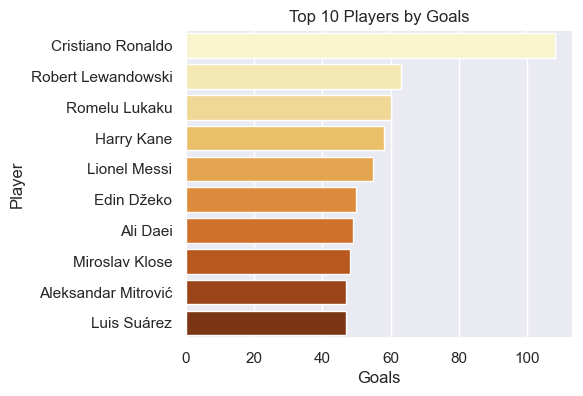

In [107]:
# Create a bar chart for the top 10 players
plt.figure(figsize=(5, 4))
sns.barplot(x=player_goals_sorted.values,y=player_goals_sorted.index, palette="YlOrBr")
plt.xlabel('Goals')
plt.ylabel('Player')
plt.title('Top 10 Players by Goals')
plt.show()

minute
90.0     1797
45.0      925
89.0      689
75.0      616
88.0      613
         ... 
96.0        4
106.0       4
113.0       3
99.0        3
122.0       1
Name: count, Length: 121, dtype: int64


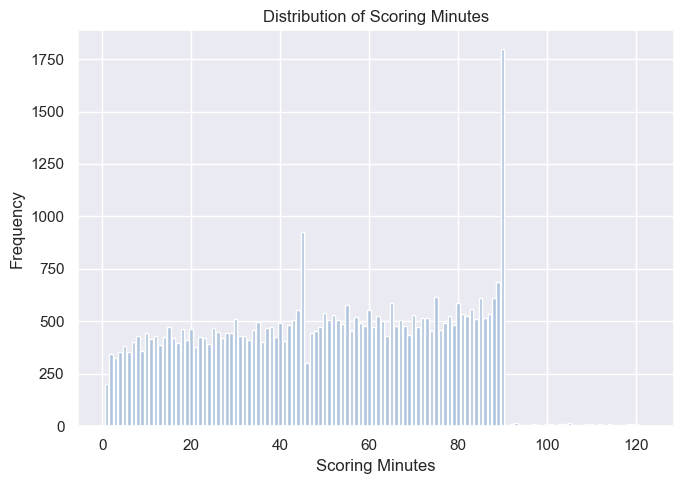

In [110]:
scoring_minutes_counts = gs['minute'].value_counts()
sorted_scoring_minutes = scoring_minutes_counts.sort_values(ascending=False)
print(sorted_scoring_minutes)

# Create a histogram
plt.figure(figsize=(7, 5))
plt.bar(sorted_scoring_minutes.index, sorted_scoring_minutes.values, color='lightsteelblue')
plt.xlabel('Scoring Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Scoring Minutes')
plt.tight_layout()

# Display the histogram
plt.show()

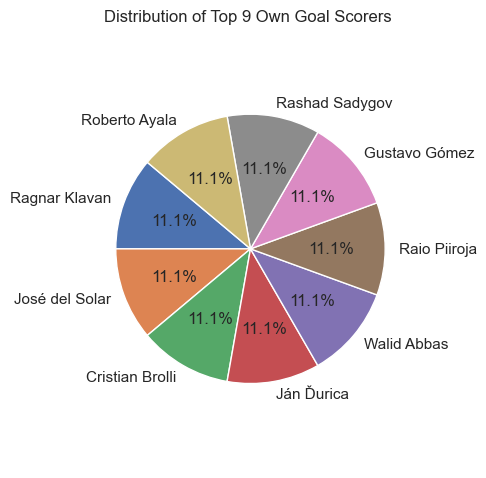

In [88]:
own_goal = gs[gs["own_goal"] == True]
own_goal_count = own_goal["scorer"].value_counts()[:9]

plt.figure(figsize=(5,5))  # Adjust the figsize as needed

# Create a pie chart
plt.pie(own_goal_count, labels=own_goal_count.index, autopct='%1.1f%%', startangle=140)

# Add title
plt.title("Distribution of Top 9 Own Goal Scorers ")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\drish\AppData\Local\Temp\ipykernel_1788\67067618.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=top_9.index, y=top_9.values,palette="colorblind")


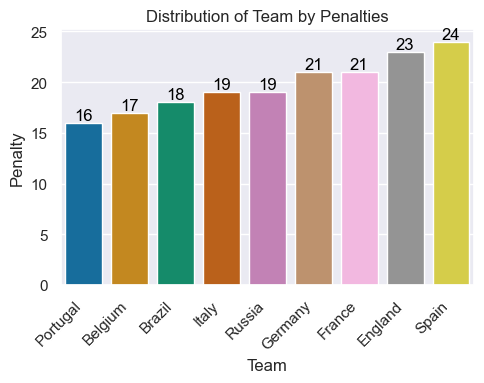

In [89]:
no_of_penalty = gs[gs["own_goal"] == True]
penalties = no_of_penalty["team"].value_counts()[:9]
top_9 = penalties.sort_values()  # Sort and select the top 9 teams

plt.figure(figsize=(5,4))  # Adjust the figsize as needed

# Create a bar plot using Seaborn's barplot function
bars = sns.barplot(x=top_9.index, y=top_9.values,palette="colorblind")

# Add labels and title
plt.xlabel("Team")
plt.ylabel("Penalty")
plt.title("Distribution of Team by Penalties")

# Add values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

In [30]:
top_9.describe()

count     9.000000
mean     19.777778
std       2.682246
min      16.000000
25%      18.000000
50%      19.000000
75%      21.000000
max      24.000000
Name: count, dtype: float64

In [31]:
res.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [32]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47399 entries, 0 to 47398
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        47399 non-null  object
 1   home_team   47399 non-null  object
 2   away_team   47399 non-null  object
 3   home_score  47399 non-null  int64 
 4   away_score  47399 non-null  int64 
 5   tournament  47399 non-null  object
 6   city        47399 non-null  object
 7   country     47399 non-null  object
 8   neutral     47399 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.9+ MB


In [33]:
newres=res.convert_dtypes()

In [34]:
newres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47399 entries, 0 to 47398
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        47399 non-null  string 
 1   home_team   47399 non-null  string 
 2   away_team   47399 non-null  string 
 3   home_score  47399 non-null  Int64  
 4   away_score  47399 non-null  Int64  
 5   tournament  47399 non-null  string 
 6   city        47399 non-null  string 
 7   country     47399 non-null  string 
 8   neutral     47399 non-null  boolean
dtypes: Int64(2), boolean(1), string(6)
memory usage: 3.1 MB


In [35]:
newres.value_counts("home_team")

home_team
Brazil                       602
Argentina                    592
Mexico                       580
South Korea                  543
Germany                      542
                            ... 
Kabylia                        1
Ryūkyū                         1
Franconia                      1
Central Spain                  1
Saint Pierre and Miquelon      1
Name: count, Length: 327, dtype: int64

In [36]:
home=newres[["home_team","home_score"]]
home_results=home.value_counts()[:10]
home_results

home_team     home_score
Argentina     1             155
              2             154
Mexico        1             151
South Korea   2             148
Brazil        2             144
Japan         1             144
England       2             143
Germany       1             141
Saudi Arabia  1             140
Switzerland   1             139
Name: count, dtype: int64

In [37]:
top_home_teams_df = pd.DataFrame({'Team': home_results.index, 'Home Wins': home_results.values})

In [38]:
top_home_teams_df

,Team,Home Wins
0,"(Argentina, 1)",155
1,"(Argentina, 2)",154
2,"(Mexico, 1)",151
3,"(South Korea, 2)",148
4,"(Brazil, 2)",144
5,"(Japan, 1)",144
6,"(England, 2)",143
7,"(Germany, 1)",141
8,"(Saudi Arabia, 1)",140
9,"(Switzerland, 1)",139


In [73]:
away=newres[["away_team","away_score"]]
ar=away.value_counts()[:10]
ar

away_team         away_score
Uruguay           1             177
Sweden            1             172
Paraguay          0             171
Uruguay           0             171
Paraguay          1             168
Finland           0             168
                  1             165
Argentina         1             162
Northern Ireland  0             162
Chile             0             160
Name: count, dtype: int64

In [74]:
top_away_teams_df = pd.DataFrame({'Team': ar.index, 'Away Wins': ar.values})

In [75]:
top_away_teams_df

,Team,Away Wins
0,"(Uruguay, 1)",177
1,"(Sweden, 1)",172
2,"(Paraguay, 0)",171
3,"(Uruguay, 0)",171
4,"(Paraguay, 1)",168
5,"(Finland, 0)",168
6,"(Finland, 1)",165
7,"(Argentina, 1)",162
8,"(Northern Ireland, 0)",162
9,"(Chile, 0)",160


In [77]:
print("Top 10 Home Teams with Most Score:")
print(top_home_teams_df)

print("\nTop 10 Away Teams with Most Score:")
print(top_away_teams_df)

Top 10 Home Teams with Most Score:
                Team  Home Wins
0     (Argentina, 1)        155
1     (Argentina, 2)        154
2        (Mexico, 1)        151
3   (South Korea, 2)        148
4        (Brazil, 2)        144
5         (Japan, 1)        144
6       (England, 2)        143
7       (Germany, 1)        141
8  (Saudi Arabia, 1)        140
9   (Switzerland, 1)        139

Top 10 Away Teams with Most Score:
                    Team  Away Wins
0           (Uruguay, 1)        177
1            (Sweden, 1)        172
2          (Paraguay, 0)        171
3           (Uruguay, 0)        171
4          (Paraguay, 1)        168
5           (Finland, 0)        168
6           (Finland, 1)        165
7         (Argentina, 1)        162
8  (Northern Ireland, 0)        162
9             (Chile, 0)        160


(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(-2.0, 0, 'Iran'),
  Text(0.0, 0, 'Thailand'),
  Text(2.0, 0, 'Zambia'),
  Text(4.0, 0, 'Kenya'),
  Text(6.0, 0, 'Argentina'),
  Text(8.0, 0, 'Iran'),
  Text(10.0, 0, '')])

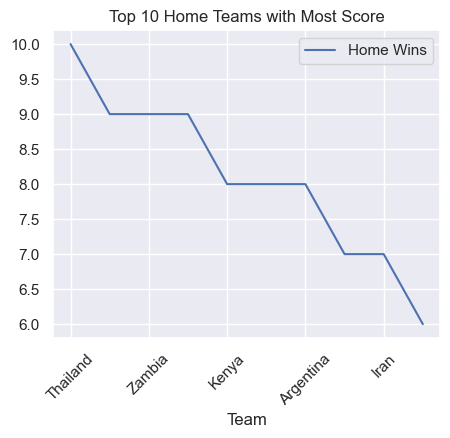

In [112]:
sns.set() 
top_home_teams_df.plot.line(x='Team', y='Home Wins',figsize=(5,4))
plt.title("Top 10 Home Teams with Most Score")
plt.xticks(rotation=45)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(-2.0, 0, 'Angola'),
  Text(0.0, 0, 'Egypt'),
  Text(2.0, 0, 'Argentina'),
  Text(4.0, 0, 'South Korea'),
  Text(6.0, 0, 'Iraq'),
  Text(8.0, 0, 'Angola'),
  Text(10.0, 0, '')])

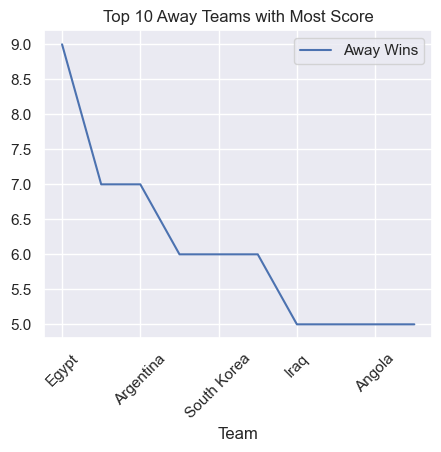

In [113]:
sns.set() 
top_away_teams_df.plot.line(x='Team', y='Away Wins',figsize=(5,4))
plt.title("Top 10 Away Teams with Most Score")
plt.xticks(rotation=45)

In [90]:
so.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           644 non-null    object
 1   home_team      644 non-null    object
 2   away_team      644 non-null    object
 3   winner         644 non-null    object
 4   first_shooter  230 non-null    object
dtypes: object(5)
memory usage: 25.3+ KB


In [98]:
so.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


Top 10 Home Teams with Most Wins:
           Team  Home Wins
0      Thailand         10
1   South Korea          9
2        Zambia          9
3  South Africa          9
4         Kenya          8
5       Senegal          8
6     Argentina          8
7     Indonesia          7
8          Iran          7
9       Uruguay          6

Top 10 Away Teams with Most Wins:
          Team  Away Wins
0        Egypt          9
1     Cameroon          7
2    Argentina          7
3       Guinea          6
4  South Korea          6
5       Uganda          6
6         Iraq          5
7  Ivory Coast          5
8       Angola          5
9     Colombia          5


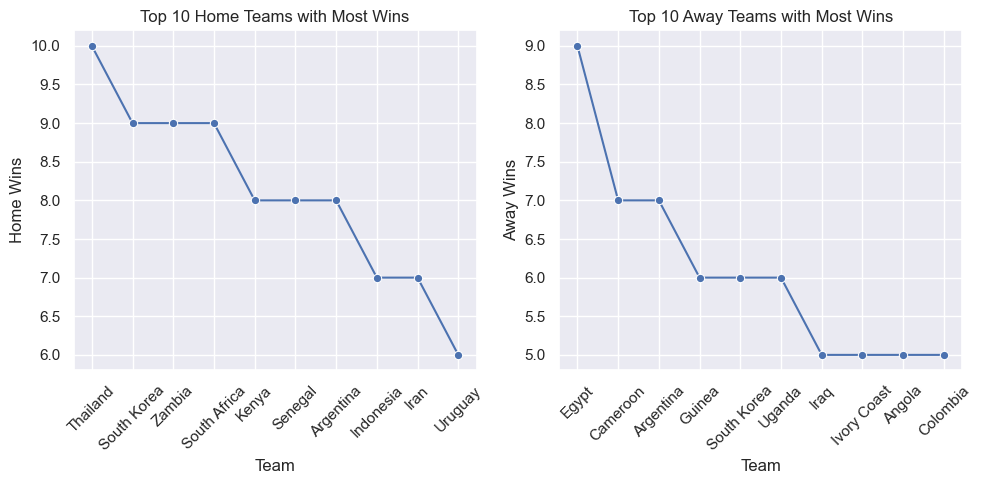

In [97]:
home_wins =so[so['winner'] == so['home_team']]
home_team_wins = home_wins['home_team'].value_counts()

away_wins = so[so['winner'] ==so['away_team']]
away_team_wins = away_wins['away_team'].value_counts()

top_10_home_teams = home_team_wins.head(10)
top_10_away_teams = away_team_wins.head(10)

top_home_teams_df = pd.DataFrame({'Team': top_10_home_teams.index, 'Home Wins': top_10_home_teams.values})
top_away_teams_df = pd.DataFrame({'Team': top_10_away_teams.index, 'Away Wins': top_10_away_teams.values})

print("Top 10 Home Teams with Most Wins:")
print(top_home_teams_df)

print("\nTop 10 Away Teams with Most Wins:")
print(top_away_teams_df)

plt.figure(figsize=(10, 5))  

plt.subplot(1, 2, 1) 
sns.lineplot(x='Team', y='Home Wins', data=top_home_teams_df, marker='o')
plt.xticks(rotation=45)
plt.title('Top 10 Home Teams with Most Wins')

plt.subplot(1, 2, 2) 
sns.lineplot(x='Team', y='Away Wins', data=top_away_teams_df, marker='o')
plt.xticks(rotation=45)
plt.title('Top 10 Away Teams with Most Wins')

plt.tight_layout() 
plt.show()